In [7]:
import pandas as pd

# Load the NFCS data
df = pd.read_csv("dataset1/NFCS_2021_Investor_Data_221121.csv")

# Select only the required columns
columns = [
    "S_Age", "S_Income", "S_Education", "B10",
    "F30_1", "F30_2", "F30_3", "F30_4", "F30_5", "F30_6",
    "F30_7", "F30_8", "F30_9", "F30_10", "F30_11", "F30_12"
]
df = df[columns].copy()

# Drop missing values
df.dropna(inplace=True)

# Map risk profile from B10
def map_risk(val):
    if val == 1:
        return "Conservative"
    elif val == 2:
        return "Moderate"
    elif val == 3:
        return "Aggressive"
    else:
        return "Unknown"

# Apply mapping
df['risk_profile'] = df['B10'].apply(map_risk)

# Filter out unknowns
df = df[df['risk_profile'] != "Unknown"]

# Reset index for cleanliness
df.reset_index(drop=True, inplace=True)

# Show result
print("✅ Shape:", df.shape)
print("✅ Columns:", df.columns.tolist())
print(df.head())





✅ Shape: (2485, 17)
✅ Columns: ['S_Age', 'S_Income', 'S_Education', 'B10', 'F30_1', 'F30_2', 'F30_3', 'F30_4', 'F30_5', 'F30_6', 'F30_7', 'F30_8', 'F30_9', 'F30_10', 'F30_11', 'F30_12', 'risk_profile']
   S_Age  S_Income  S_Education  B10  F30_1  F30_2  F30_3  F30_4  F30_5  \
0      1         3            2    2      2      3      2      3      3   
1      3         1            2    3      2      2      3      2      2   
2      3         2            2    3      2      2      1      2      2   
3      2         1            1    3     99     99     99     99     99   
4      3         1            1    3      3      1      1      1      1   

   F30_6  F30_7  F30_8  F30_9  F30_10  F30_11  F30_12 risk_profile  
0      2      3      2      1       2       1       1     Moderate  
1      2      2      2      2       2       2       2   Aggressive  
2      1      1      2      1       2       1       2   Aggressive  
3     99     99     99     99      99      99       3   Aggressive  
4 

In [8]:
print(df)



      S_Age  S_Income  S_Education  B10  F30_1  F30_2  F30_3  F30_4  F30_5  \
0         1         3            2    2      2      3      2      3      3   
1         3         1            2    3      2      2      3      2      2   
2         3         2            2    3      2      2      1      2      2   
3         2         1            1    3     99     99     99     99     99   
4         3         1            1    3      3      1      1      1      1   
...     ...       ...          ...  ...    ...    ...    ...    ...    ...   
2480      3         2            1    3      2      2      1      2      1   
2481      3         2            2    2      1      3      1      3      1   
2482      2         3            2    1      3      3      3      3      3   
2483      1         3            2    3      3      3      2      3      2   
2484      3         3            1    3      1      3      1      1      2   

      F30_6  F30_7  F30_8  F30_9  F30_10  F30_11  F30_12  risk_

In [9]:
import pandas as pd

df = pd.read_csv("dataset1/NFCS_2021_Investor_Data_221121.csv")
print(df.columns.tolist())


['NFCSID', 'A1', 'A2', 'A3', 'B2_1', 'B2_2', 'B2_3', 'B2_4', 'B2_5', 'B2_7', 'B2_20', 'B2_21', 'B2_23', 'B2_24', 'B2_25', 'B30', 'B31', 'B3', 'B32', 'B4', 'B5', 'B6', 'B20', 'B33', 'B34', 'B10', 'B11', 'B35', 'B23', 'B24', 'B25', 'B26', 'C22_1', 'C22_2', 'C22_3', 'C22_4', 'C23_1', 'C23_2', 'C23_3', 'C23_4', 'C24', 'C25', 'C26', 'C30', 'C7', 'D1_1', 'D1_2', 'D2', 'D3', 'D21', 'D30', 'D31', 'E1_1', 'E20', 'E5', 'E6', 'F30_1', 'F30_2', 'F30_3', 'F30_4', 'F30_5', 'F30_6', 'F30_7', 'F30_8', 'F30_9', 'F30_10', 'F30_11', 'F30_12', 'F31_1', 'F31_2', 'F31_3', 'F31_4', 'F31_5', 'F31_6', 'F31_7', 'F31_8', 'F31_9', 'F31_10', 'F31_11', 'G1', 'G2', 'G30_1', 'G30_2', 'G30_3', 'G30_4', 'G30_5', 'G30_6', 'G31', 'G4', 'G5', 'G6', 'G7', 'G21', 'G8', 'G22', 'G11', 'G12', 'G13', 'G23', 'H31', 'WGT1', 'S_Gender2', 'S_Age', 'S_Ethnicity', 'S_Education', 'S_Income']


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import joblib

# 1. Load data
df = pd.read_csv("dataset1/NFCS_2021_Investor_Data_221121.csv")

# 2. Select columns and drop missing
columns = [
    "S_Age", "S_Income", "S_Education", "B10",
    "F30_1", "F30_2", "F30_3", "F30_4", "F30_5", "F30_6",
    "F30_7", "F30_8", "F30_9", "F30_10", "F30_11", "F30_12"
]
df = df[columns].dropna()

# 3. Map risk profile
def map_risk(val):
    if val == 1:
        return "Conservative"
    elif val == 2:
        return "Moderate"
    elif val == 3:
        return "Aggressive"
    else:
        return "Unknown"

df['risk_profile'] = df['B10'].apply(map_risk)
df = df[df['risk_profile'] != "Unknown"]
df.drop(columns=["B10"], inplace=True)

# 4. Features and target
X = df.drop(columns=["risk_profile"])
y = df["risk_profile"]

print("Original class distribution:")
print(y.value_counts())

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 6. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nBefore SMOTE (training set):")
print(pd.Series(y_train).value_counts())

# 7. Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("\nAfter SMOTE (training set):")
print(pd.Series(y_train_resampled).value_counts())

# 8. Encode labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train_resampled)
y_test_enc = le.transform(y_test)

# 9. Setup XGBoost classifier
xgb_clf = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(le.classes_),
    eval_metric='mlogloss',
    random_state=42,
    use_label_encoder=False  # can remove if warning appears
)

# 10. Hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of boosting round
    'max_depth': [3, 5, 7, 10, 15],              #Maximum depth of trees
    'learning_rate': [0.01, 0.05, 0.1, 0.2],     #Step size shrinkage to prevent overfitting
    'subsample': [0.6, 0.8, 1.0],                #Fraction of rows used for each tree
    'colsample_bytree': [0.6, 0.8, 1.0],         #Fraction of columns (features) used per tree
    'gamma': [0, 0.1, 0.2, 0.3],                 #Minimum loss reduction for a split
    'min_child_weight': [1, 3, 5]                 #Minimum sum of instance weights in a child node
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=30,
    scoring='f1_weighted',
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

print("\nStarting hyperparameter tuning for XGBoost...")
random_search.fit(X_train_resampled, y_train_enc)

print("\nBest parameters found:")
print(random_search.best_params_)

best_xgb = random_search.best_estimator_

# 11. Evaluate on test
y_pred_enc = best_xgb.predict(X_test_scaled)
y_pred = le.inverse_transform(y_pred_enc)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 12. Save model, scaler, and label encoder
joblib.dump(best_xgb, "risk_xgb_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le, "label_encoder.pkl")
print("\nModel, scaler, and label encoder saved successfully!")


# 13. Allocation dictionary (predefined)
allocation_dict = {
    "Conservative": {
        "Stocks": 34.64,
        "Mutual Funds": 30.07,
        "Gold": 19.84,
        "PPF": 10.14,
        "Savings": 5.10,
        "Emergency Fund": 0.21
    },
    "Moderate": {
        "Stocks": 50.00,
        "Mutual Funds": 30.00,
        "Gold": 10.00,
        "PPF": 5.00,
        "Savings": 4.00,
        "Emergency Fund": 1.00
    },
    "Aggressive": {
        "Stocks": 70.00,
        "Mutual Funds": 20.00,
        "Gold": 5.00,
        "PPF": 2.00,
        "Savings": 2.00,
        "Emergency Fund": 1.00
    }
}

# 14. Feature list for prediction input
feature_list = [
    "S_Age", "S_Income", "S_Education",
    "F30_1", "F30_2", "F30_3", "F30_4", "F30_5", "F30_6",
    "F30_7", "F30_8", "F30_9", "F30_10", "F30_11", "F30_12"
]

# 15. Dynamic prediction + allocation function
def predict_allocation(new_user_input, model, scaler, label_encoder, allocation_dict, feature_list):
    # Fill missing features with 0
    input_filled = {feat: new_user_input.get(feat, 0) for feat in feature_list}
    df_input = pd.DataFrame([input_filled])
    scaled_input = scaler.transform(df_input)
    pred_encoded = model.predict(scaled_input)[0]
    pred_label = label_encoder.inverse_transform([pred_encoded])[0]
    allocation = allocation_dict.get(pred_label, {})
    return pred_label, allocation


# 16. Example usage
if __name__ == "__main__":
    # Example new user input (can be partial)
    new_user_data = {
        "S_Age": 2,
        "S_Income": 3,
        "S_Education": 1,
        "F30_1": 1,
        "F30_3": 2,
        # Other features missing, will be auto-filled with 0
    }

    predicted_risk, allocation = predict_allocation(
        new_user_data, best_xgb, scaler, le, allocation_dict, feature_list
    )

    print(f"\nPredicted Risk Profile: {predicted_risk}")
    print(" Suggested Allocation:")
    for asset, pct in allocation.items():
        print(f"{asset:<15}: {pct:.2f}%")


Original class distribution:
risk_profile
Aggressive      1484
Moderate         772
Conservative     229
Name: count, dtype: int64

Before SMOTE (training set):
risk_profile
Aggressive      1187
Moderate         618
Conservative     183
Name: count, dtype: int64

After SMOTE (training set):
risk_profile
Aggressive      1187
Conservative    1187
Moderate        1187
Name: count, dtype: int64

Starting hyperparameter tuning for XGBoost...
Fitting 3 folds for each of 30 candidates, totalling 90 fits


C:\Users\mruna\anaconda3\envs\LATEST\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:30:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best parameters found:
{'subsample': 0.8, 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 15, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 0.8}

Classification Report:
               precision    recall  f1-score   support

  Aggressive       0.64      0.73      0.68       297
Conservative       0.27      0.17      0.21        46
    Moderate       0.30      0.25      0.27       154

    accuracy                           0.53       497
   macro avg       0.40      0.38      0.39       497
weighted avg       0.50      0.53      0.51       497


 Confusion Matrix:
 [[218   9  70]
 [ 21   8  17]
 [103  13  38]]

Model, scaler, and label encoder saved successfully!

Predicted Risk Profile: Aggressive
 Suggested Allocation:
Stocks         : 70.00%
Mutual Funds   : 20.00%
Gold           : 5.00%
PPF            : 2.00%
Savings        : 2.00%
Emergency Fund : 1.00%


After SMOTE class distribution:
risk_profile
2    1484
0    1484
1    1484
Name: count, dtype: int64
Fitting 3 folds for each of 30 candidates, totalling 90 fits

Best Parameters:
 {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}

 Classification Report:
               precision    recall  f1-score   support

  Aggressive       0.64      0.78      0.70       297
Conservative       0.86      0.86      0.86       297
    Moderate       0.67      0.51      0.58       297

    accuracy                           0.72       891
   macro avg       0.72      0.72      0.71       891
weighted avg       0.72      0.72      0.71       891

Accuracy: 0.7182940516273849

Confusion Matrix:
 [[232  12  53]
 [ 18 256  23]
 [115  30 152]]


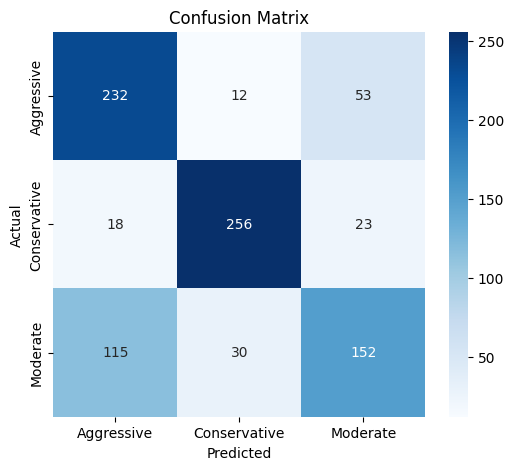

 Model, scaler, and label encoder saved successfully!


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Load your dataset
df = pd.read_csv("dataset1/NFCS_2021_Investor_Data_221121.csv") 


# 2. Select columns and drop missing
columns = [
    "S_Age", "S_Income", "S_Education", "B10",
    "F30_1", "F30_2", "F30_3", "F30_4", "F30_5", "F30_6",
    "F30_7", "F30_8", "F30_9", "F30_10", "F30_11", "F30_12"
]
df = df[columns].dropna()

# 3. Map risk profile
def map_risk(val):
    if val == 1:
        return "Conservative"
    elif val == 2:
        return "Moderate"
    elif val == 3:
        return "Aggressive"
    else:
        return "Unknown"

df['risk_profile'] = df['B10'].apply(map_risk)
df = df[df['risk_profile'] != "Unknown"]
df.drop(columns=["B10"], inplace=True)

label_encoder = LabelEncoder()
df['risk_profile'] = label_encoder.fit_transform(df['risk_profile'])

X = df.drop("risk_profile", axis=1)
y = df["risk_profile"]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print("After SMOTE class distribution:")
print(pd.Series(y_resampled).value_counts())

# Split the balanced data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Hyperparameter tuning
param_dist = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
rsearch = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=30, 
                             scoring='accuracy', cv=cv, verbose=1, random_state=42, n_jobs=-1)

rsearch.fit(X_train, y_train)

print("\nBest Parameters:\n", rsearch.best_params_)

# Train best model
best_rf = rsearch.best_estimator_
best_rf.fit(X_train, y_train)

# Evaluation
y_pred = best_rf.predict(X_test)
print("\n Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save model, scaler, encoder
with open("model.pkl", "wb") as f:
    pickle.dump(best_rf, f)
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
with open("encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

print(" Model, scaler, and label encoder saved successfully!")

# Real-time prediction + allocation
def predict_and_allocate(new_data):
    # Load components
    with open("model.pkl", "rb") as f:
        model = pickle.load(f)
    with open("scaler.pkl", "rb") as f:
        scaler = pickle.load(f)
    with open("encoder.pkl", "rb") as f:
        encoder = pickle.load(f)

    new_data_scaled = scaler.transform([new_data])
    prediction = model.predict(new_data_scaled)[0]
    risk_profile = encoder.inverse_transform([prediction])[0]

    print("\nPredicted Risk Profile:", risk_profile)

    allocation_dict = {
        "Aggressive": {
            "Stocks": 70, "Mutual Funds": 20, "Gold": 5, "PPF": 2, "Savings": 2, "Emergency Fund": 1
        },
        "Moderate": {
            "Stocks": 40, "Mutual Funds": 25, "Gold": 10, "PPF": 10, "Savings": 10, "Emergency Fund": 5
        },
        "Conservative": {
            "Stocks": 10, "Mutual Funds": 15, "Gold": 15, "PPF": 20, "Savings": 30, "Emergency Fund": 10
        }
    }

    print(" Suggested Allocation:")
    for asset, percent in allocation_dict[risk_profile].items():
        print(f"{asset:<15}: {percent:.2f}%")

# Example prediction (pass a new user input)
#predict_and_allocate([30, 60000, 5, 2, 1])  # <-- Example input vector



Model Comparison:
                  Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.528620   0.513666  0.528620  0.479406  0.687460
1        Decision Tree  0.655443   0.656568  0.655443  0.654713  0.754427
2        Random Forest  0.718294   0.720448  0.718294  0.713486  0.876829
3                  SVM  0.542088   0.534111  0.542088  0.496685  0.722245


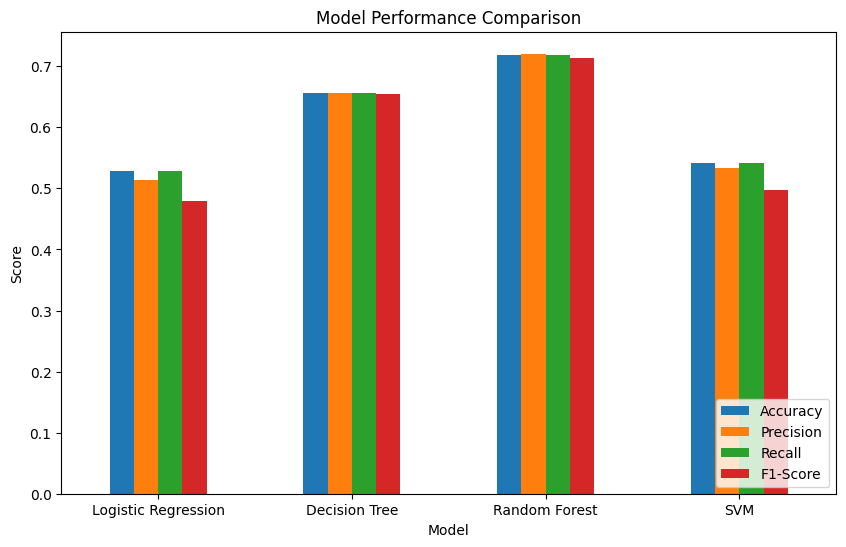

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": best_rf,  # already tuned
    "SVM": SVC(probability=True, random_state=42)
}

# Collect results
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted")
    rec = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    roc = roc_auc_score(y_test, y_proba, multi_class="ovr") if y_proba is not None else np.nan

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "ROC-AUC": roc
    })

# Show comparison table
comparison_df = pd.DataFrame(results)
print("\nModel Comparison:\n", comparison_df)

# Plot comparison
comparison_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1-Score"]].plot(
    kind="bar", figsize=(10,6)
)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()


 After SMOTE class distribution:
risk_profile
2    1484
0    1484
1    1484
Name: count, dtype: int64
Fitting 3 folds for each of 48 candidates, totalling 144 fits

 Best RF Parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

 RF Report:
               precision    recall  f1-score   support

  Aggressive       0.63      0.78      0.70       297
Conservative       0.87      0.86      0.86       297
    Moderate       0.67      0.53      0.59       297

    accuracy                           0.72       891
   macro avg       0.72      0.72      0.72       891
weighted avg       0.72      0.72      0.72       891

 RF Accuracy: 0.7205387205387206
Fitting 3 folds for each of 72 candidates, totalling 216 fits


C:\Users\mruna\anaconda3\envs\LATEST\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:31:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 Best XGB Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}

 XGB Report:
               precision    recall  f1-score   support

  Aggressive       0.65      0.81      0.72       297
Conservative       0.86      0.86      0.86       297
    Moderate       0.68      0.51      0.58       297

    accuracy                           0.73       891
   macro avg       0.73      0.73      0.72       891
weighted avg       0.73      0.73      0.72       891

 XGB Accuracy: 0.7272727272727273
Fitting 3 folds for each of 12 candidates, totalling 36 fits

 Best SVM Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

 SVM Report:
               precision    recall  f1-score   support

  Aggressive       0.49      0.77      0.59       297
Conservative       0.76      0.61      0.68       297
    Moderate       0.48      0.30      0.37       297

    accuracy                           0.56       891
   macro avg       0.58     

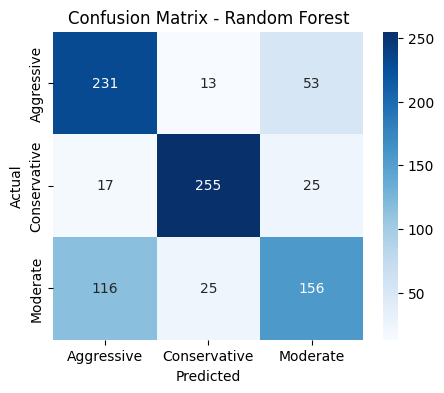

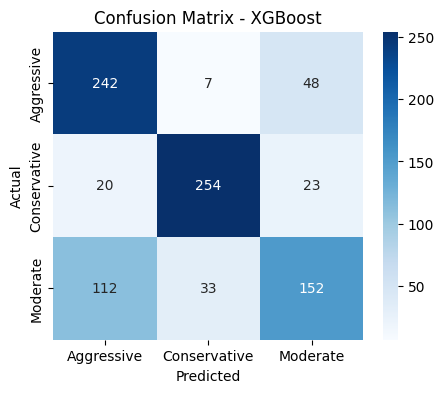

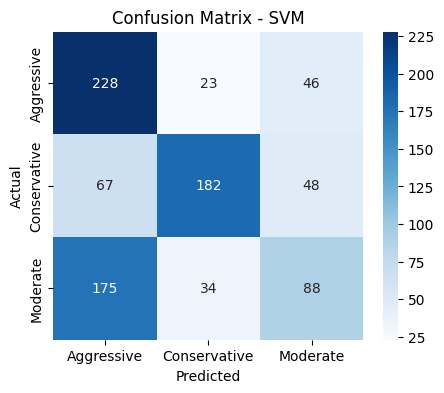


 Best Model is: XGBoost with Accuracy: 0.7272727272727273
Best model, scaler, and encoder saved successfully!


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import xgboost as xgb

# 1. Load dataset
df = pd.read_csv("dataset1/NFCS_2021_Investor_Data_221121.csv")

# 2. Select relevant columns and drop missing
columns = [
    "S_Age", "S_Income", "S_Education", "B10",
    "F30_1", "F30_2", "F30_3", "F30_4", "F30_5", "F30_6",
    "F30_7", "F30_8", "F30_9", "F30_10", "F30_11", "F30_12"
]
df = df[columns].dropna()

# 3. Map risk profile
def map_risk(val):
    if val == 1:
        return "Conservative"
    elif val == 2:
        return "Moderate"
    elif val == 3:
        return "Aggressive"
    else:
        return "Unknown"

df['risk_profile'] = df['B10'].apply(map_risk)
df = df[df['risk_profile'] != "Unknown"]
df.drop(columns=["B10"], inplace=True)

# Encode target
label_encoder = LabelEncoder()
df['risk_profile'] = label_encoder.fit_transform(df['risk_profile'])

X = df.drop("risk_profile", axis=1)
y = df["risk_profile"]

# 4. Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Handle imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print(" After SMOTE class distribution:")
print(pd.Series(y_resampled).value_counts())

# 6. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2,
    random_state=42, stratify=y_resampled
)

# Define StratifiedKFold
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# ===============================
# Model 1: Random Forest
# ===============================
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 7, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, scoring="accuracy", cv=cv, n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

print("\n Best RF Parameters:", rf_grid.best_params_)
y_pred_rf = best_rf.predict(X_test)
print("\n RF Report:\n", classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))
print(" RF Accuracy:", accuracy_score(y_test, y_pred_rf))

# ===============================
# Model 2: XGBoost
# ===============================
xgb_clf = xgb.XGBClassifier(objective="multi:softmax", num_class=3,
                            eval_metric="mlogloss", use_label_encoder=False,
                            random_state=42)

xgb_params = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.05, 0.1, 0.2],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}
xgb_grid = GridSearchCV(xgb_clf, xgb_params, scoring="accuracy", cv=cv, n_jobs=-1, verbose=1)
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_

print("\n Best XGB Parameters:", xgb_grid.best_params_)
y_pred_xgb = best_xgb.predict(X_test)
print("\n XGB Report:\n", classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))
print(" XGB Accuracy:", accuracy_score(y_test, y_pred_xgb))

# ===============================
#  Model 3: Support Vector Machine (SVM)
# ===============================
svm = SVC(probability=True, random_state=42)

svm_params = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"]
}
svm_grid = GridSearchCV(svm, svm_params, scoring="accuracy", cv=cv, n_jobs=-1, verbose=1)
svm_grid.fit(X_train, y_train)
best_svm = svm_grid.best_estimator_

print("\n Best SVM Parameters:", svm_grid.best_params_)
y_pred_svm = best_svm.predict(X_test)
print("\n SVM Report:\n", classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_))
print(" SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

# ===============================
# 🔹 Compare Confusion Matrices
# ===============================
models = {
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb,
    "SVM": y_pred_svm
}

for name, preds in models.items():
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# ===============================
#  Save the best model
# ===============================
# choose model with highest accuracy
accuracies = {
    "RandomForest": accuracy_score(y_test, y_pred_rf),
    "XGBoost": accuracy_score(y_test, y_pred_xgb),
    "SVM": accuracy_score(y_test, y_pred_svm)
}
best_model_name = max(accuracies, key=accuracies.get)
print("\n Best Model is:", best_model_name, "with Accuracy:", accuracies[best_model_name])

best_model = {"RandomForest": best_rf, "XGBoost": best_xgb, "SVM": best_svm}[best_model_name]

with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
with open("encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

print("Best model, scaler, and encoder saved successfully!")
